In [8]:
%store -r X_train X_test y_train y_test

In [9]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B'], dtype=object)

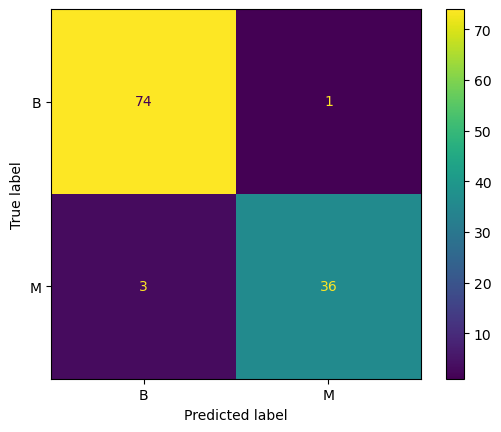

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
display_matrix = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
display_matrix.plot()

In [12]:
classifier.score(X_test, y_test)*100

96.49122807017544

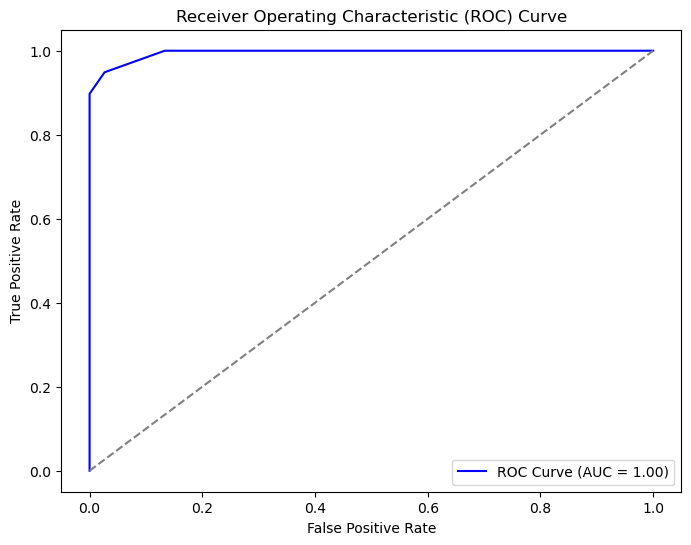

In [13]:
import matplotlib.pyplot as plt
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="M")
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
